In [2]:
# import numpy as np
# from numpy import sqrt, zeros, exp, log
# from numpy.random import exponential, rand, randn, lognormal
# from scipy.stats import lognorm
# from scipy.stats import norm as ndist
# from numpy.linalg import norm

import autograd.numpy as np
from autograd import grad, jacobian
from autograd.numpy import zeros, exp, log
from autograd.numpy.random import exponential, rand, randn, lognormal
from autograd.numpy.linalg import norm
from autograd.scipy.stats import norm as ndist
from math import sqrt

import matplotlib.pyplot as plt

In [20]:
def f(xi, x0=100, y0=100, dt=1.0, sx=1.0, sy=1.0):
    """Deterministic function for LV simulator. Here xi = (logtheta, u)
    because we assign a logNormal prior on the parameters, so it is easier to
    work with logtheta."""
    logtheta, u = xi[:4], xi[4:]
    t1, t2, t3, t4 = exp(logtheta)
    N = len(u) // 2
    xvec = zeros(N+1, dtype=object)
    yvec = zeros(N+1, dtype=object)
    xvec[0] = x0
    yvec[0] = y0
    for i in range(N):
        xvec[i+1] = max(0, xvec[i] + dt * (t1*xvec[i] - t2*xvec[i]*yvec[i]) + sqrt(dt) * sx * u[2*i])
        yvec[i+1] = max(0, yvec[i] + dt * (t4*xvec[i]*yvec[i] - t3*yvec[i]) + sqrt(dt) * sy * u[2*i+1])
    return np.concatenate((xvec[1:], yvec[1:]))

In [21]:
jacobian_f = jacobian(f)
jacobian_f(xi_star)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [119]:
def fnorm(xi, ystar):
    return norm(f(xi) - ystar)

In [120]:
def logprior(xi):
    """logtheta ~ N(-2, 1.0) for each theta. Remember xi contains
    logtheta and not theta. We assign a normal prior to the latents."""
    logtheta, u = xi[:4], xi[4:]
    return ndist(loc=-2, scale=1.0).logpdf(logtheta).sum() + ndist.logpdf(xi[4:]).sum()

In [121]:
def log_epanechnikov_kernel(xi, epsilon, fnorm, ystar):
    u = fnorm(xi, ystar)
    with np.errstate(divide='ignore'):
        return log((3*(1 - (u**2 / (epsilon**2))) / (4*epsilon)) * float(u <= epsilon))

In [122]:
def log_abc_posterior(xi, epsilon, fnorm, ystar):
    return logprior(xi) + log_epanechnikov_kernel(xi, epsilon, fnorm, ystar)

In [3]:
N = 100
u_star = randn(N)
theta_star = np.array([0.4, 0.005, 0.05, 0.001])
log_theta_star = log(theta_star)
xi_star = np.concatenate((log_theta_star, u_star))
epsilon = 100

In [4]:
y_star = f(xi_star)

In [5]:
logpi = lambda xi: log_abc_posterior(xi, epsilon, fnorm, y_star)

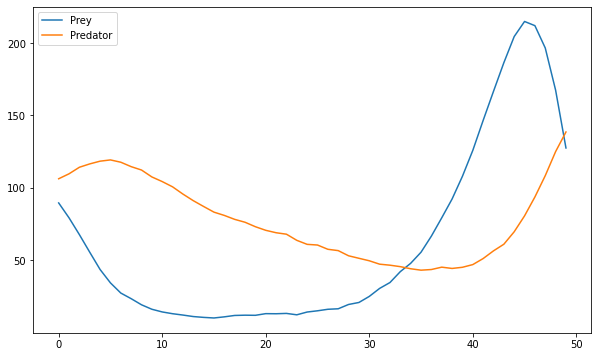

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(y_star[:N//2], label="Prey")
ax.plot(y_star[N//2:], label="Predator")
plt.legend()
plt.show()

In [24]:
from scipy.stats import lognorm

In [29]:
from numpy.random import lognormal

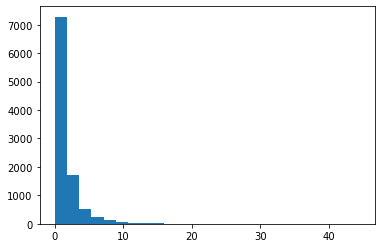

In [47]:
_ = plt.hist(lognormal(size=10000), bins=25)

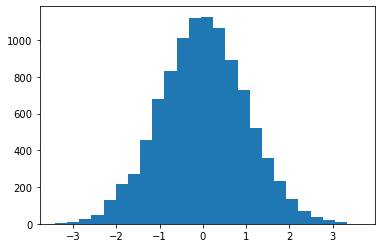

In [48]:
_ = plt.hist(np.log(lognormal(size=10000)), bins=25)

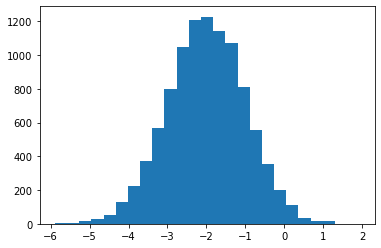

In [49]:
_ = plt.hist(np.log(lognormal(mean=-2, size=10000)), bins=25)

In [67]:
lognormal(mean=-2, sigma=1.0, size=1000000).mean()

0.2225080670623931

In [72]:
lognorm(s=1.0, scale=exp(-2))

0.22217431637131374